<a href="https://colab.research.google.com/github/mohammedislam1776/Mo-s-work/blob/main/Cyclistic_Bike_Sharing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scenario**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

# **Business Task**
How do annual members and casual riders use Cyclistic bikes
differently?


# **Preparing the Data For Exploration**
*   Cyclistic's ride data from December 2020 to November 2021 was published by a first-party source (in this case Cyclistic themselves) and made available to the public.
  *   Because of this, the data meets the requirements for reliability and originality.
  * In addition, the data is cited and current (as of the time of publishing this case study). 
  * There are however, concerns about completeness as there is quite a bit of missing data that we will have to take care of. 

* We're going to clean and then analyze this data using R.







**Step 1: Loading in the necessary libraries**


```
library(tidyverse)    #helps wrangle data
library(lubridate)    #helps wrangle date attributes
library(ggplot2)      #helps visualize data
getwd()               #displays your working directory
setwd("/Users/mohammedislam/Downloads/Case Study 1") 
  #sets your working directory to simplify calls to data
```



**Step 2: Importing the data into R**


```
m12_2020 <- read_csv("202012-divvy-tripdata.csv")   #December 2020 data
m1_2021 <- read_csv("202101-divvy-tripdata.csv")    #January 2021 data
m2_2021 <- read_csv("202102-divvy-tripdata.csv")    #February 2021 data
m3_2021 <- read_csv("202103-divvy-tripdata.csv")    #March 2021 data
m4_2021 <- read_csv("202104-divvy-tripdata.csv")    #April 2021 data
m5_2021 <- read_csv("202105-divvy-tripdata.csv")    #May 2021 data
m6_2021 <- read_csv("202106-divvy-tripdata.csv")    #June 2021 data
m7_2021 <- read_csv("202107-divvy-tripdata.csv")    #July 2021 data
m8_2021 <- read_csv("202108-divvy-tripdata.csv")    #August 2021 data
m9_2021 <- read_csv("202109-divvy-tripdata.csv")    #September 2021 data
m10_2021 <- read_csv("202110-divvy-tripdata.csv")   #October 2021 data
m11_2021 <- read_csv("202111-divvy-tripdata.csv")   #November 2021 data
```



**Step 3: Merging the dataframes into one single dataframe**


```
all_trips <- bind_rows(m12_2020,m1_2021,m2_2021,m3_2021,m4_2021,m5_2021,m6_2021,
                       m7_2021,m8_2021,m9_2021,m10_2021,m11_2021)
```



# **Processing the Data**

* Now that we have all of the necessary datasets merged into one dataframe, we're going to want to remove the columns with missing values.
  * The columns in question are:
    * start_station_name
    * start_station_id
    * end_station_id
    * end_station_id
* To do that, we'll need to change the `all_trips` dataframe so that it contains all but those specific columns:
```
all_trips <- all_trips %>% select(-c(start_station_name, start_station_id, end_station_name, end_station_id))
colnames(all_trips)
```
* Another issue we have is that we will need to aggregate data by the day of the week but we can only aggregate data at the ride level.
  * To fix this issue, we will need to create columns for each month, day, year, and day of the week. 
```
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
```

* A third issue we have is that the datasets (now compiled into the dataframe) did not have a dedicated column for trip duration data.
  * We will have to create our own column called `ride_length`.
    * We can do this by using the `difftime()` function, which subtracts the start time of each ride from the end time, giving us the length of each ride.

```
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)
```
* Next, you'll want to inspect the structure of `all_trips`, or in other words, look at the data types of each column and make sure there won't be any data type related issues during analysis.
```
str(all_trips)
```
* Uh oh. That's weird. Why is `ride_length`'s data type *factor*? We want it to be *numeric*. 
* This can be fixed by creating a nested function that converts `ride_length `to a *character* type, and then to a *numeric* type. 
```
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
```
* Now let's make sure that everything went smoothly. 
```
is.numeric(all_trips$ride_length)
[1] TRUE
```
* Awesome! Now, there's one last issue that we need to deal with. There are some rides where `ride_length` shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.
```
all_trips_v2 <- all_trips[!(all_trips$rideable_type == "docked_bike" | all_trips$ride_length<0),]
```
* Now that we've done our cleaning, we can move on to our descriptive analysis.

# **Descriptive Analysis**

Let's do some quick descriptive analysis by summarizing the dataset.
```
summary(all_trips_v2$ride_length)

Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     397     697    1115    1236   93596 
```
From this we can determine that the shortest bike ride was 0 seconds (someone might have purchased a single pass ride by accident) and the longest ride was 93,596 seconds (which is strange since there are 86,400 seconds in a day and that means that someone might have forgotten to dock a bike). 


Now let's compare member and casual riders.
```
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)

all_trips_v2$member_casual all_trips_v2$ride_length
1                     casual                1510.8370
2                     member                 825.7756

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)

 all_trips_v2$member_casual all_trips_v2$ride_length
1                     casual                      893
2                     member                      583

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)

all_trips_v2$member_casual all_trips_v2$ride_length
1                     casual                    93596
2                     member                    93596

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual all_trips_v2$ride_length
1                     casual                        0
2                     member                        0
```

Now we want to see the average number of rides for each rider type and each day of the week. 

```
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
```
You might run into an issue where the days of the week are in the wrong order. To fix that:
```
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
```
Let's try this again:

```
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

1                      casual                   Sunday                1741.2165
2                      member                   Sunday                 945.9777
3                      casual                   Monday                1516.1863
4                      member                   Monday                 800.6089
5                      casual                  Tuesday                1357.2866
6                      member                  Tuesday                 771.7542
7                      casual                Wednesday                1321.5156
8                      member                Wednesday                 779.0983
9                      casual                 Thursday                1334.9119
10                     member                 Thursday                 775.9094
11                     casual                   Friday                1418.4930
12                     member                   Friday                 808.2253
13                     casual                 Saturday                1640.4055
14                     member                 Saturday                 921.2536
```
That's cool and all, but a nicer way to view this data is by grouping both membership type and day of the week together. In other words, we want to see the average casual rider's entire week as well as the average member's week. 


```
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()                            #calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>%       # calculates the average duration
  arrange(member_casual, weekday)                                # sorts


# A tibble: 14 × 4
# Groups:   member_casual [2]
   member_casual weekday number_of_rides average_duration
   <chr>         <ord>             <int>            <dbl>
 1 casual        Sun              407339            1741.
 2 casual        Mon              245818            1516.
 3 casual        Tue              242053            1357.
 4 casual        Wed              244957            1322.
 5 casual        Thu              250367            1335.
 6 casual        Fri              312968            1418.
 7 casual        Sat              473355            1640.
 8 member        Sun              372515             946.
 9 member        Mon              407620             801.
10 member        Tue              458075             772.
11 member        Wed              458066             779.
12 member        Thu              430896             776.
13 member        Fri              428872             808.
14 member        Sat              425464             921.
  ```




# **Visualizing Our Data**

We have our data, so let's visualize it!

First we'll visualize the total number of rides per day of the week by rider type.
```
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + labs(all_trips_v2,
  title="Cyclistic Bike Rides, December 2020-November 2021", 
  subtitle = "Total Number of Bike Rides by Day of the Week and Rider Type",
  x="Day of the Week", y="Number of Rides", fill="Rider Type") + 
  scale_y_continuous(labels = scales::comma)
  ```
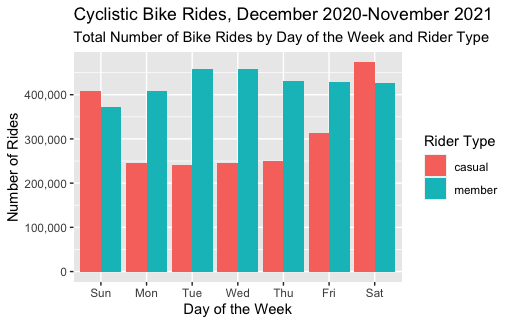

Next, we'll visualize the data for the average ride duration by day of the week and rider type. 


```
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Duration of Bike Rides, December 2020-November 2021",
  subtitle = "Average Bike Duration (in seconds) by Day of the Week and Rider Type",
  x = "Day of the Week", y = "Average duration (seconds)", fill = "Rider Type")
  ```
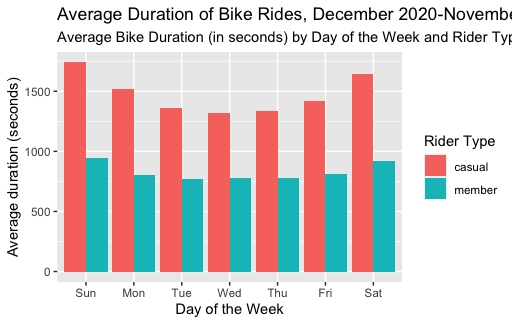


# **Key Findings**

We can see that there are more casual riders on the weekends, while member riders are more likely to go on rides on the weekdays.

In addition, casual riders tend to go on longer rides than members. 



# **Recommendations**

One recommendation for Cyclistic if their goal is to increase membership rates is to reduce the cost of a membership. It seems that casual riders have a tendency to purchase less ride passes and try to make the best of them, so lowering the cost of a membership will increase the demand for a membership.

Another recommendation is to provide incentives for ride length. Since casual riders tend to go on longer rides, promising rewards for taking those longer rides could convince them to purchase a membership. These incentives could also encourage member rides to go on longer rides.

A third and less pleasant but probably more effective recommendation is to change the payment model for casual riders from a flat fee to a fee based on ridership length that can only be countered by a membership. Since paying more for longer rides would be unpleasant, otherwise casual riders would have more of an incentive to purchase a membership and save money. 